# Symmetric Similarity Matrices
-  Here, we try to find the similarity of the nodes on the diagonal.

In [1]:
import numpy as np
import pandas as pd
import networkx as nx 


G_CV = nx.read_gml('Data/gmls/CV.gml')
G_VM = nx.read_gml('Data/gmls/VM.gml')
G_VD = nx.read_gml('Data/gmls/VD.gml')
G_VP = nx.read_gml('Data/gmls/VP.gml')

Patients    = [p for p in G_CV.nodes() if p[0]=='C']
Visits      = [p for p in G_CV.nodes() if p[0]=='V']
Medications = [p for p in G_VM.nodes() if p[0]=='M']
Diagnosis   = [p for p in G_VD.nodes() if p[0]=='D']
Procedures  = [p for p in G_VP.nodes() if p[0]=='P']

C = len(Patients)
V = len(Visits)
Me = len(Medications)
D = len(Diagnosis)
P = len(Procedures)

t = [C, V, Me, D, P]
total = sum(t)

In [2]:
def get_adjacency(G, Nodes1, Nodes2):
    W = np.zeros((len(Nodes1), len(Nodes2)))
    for i, n in enumerate(Nodes1):
        for j, m in enumerate(Nodes2):
            if G.has_edge(n,m) or G.has_edge(m,n):
                W[i, j] = 1
    return W

def M(W1, W2):
    return np.dot(W1, W2)
            
def symmmetric_assign(W, shift, t):
    rows = W.shape[0]
    cols = W.shape[1]
    
    newW = np.zeros((t,t))
    for i in range(0, rows):
        for j in range(0, cols):
            newW[i+shift][j+shift] = W[i][j]
    return newW

W_cv = get_adjacency(G_CV, Patients, Visits)
W_vm = get_adjacency(G_VM, Visits, Medications)
W_vd = get_adjacency(G_VD, Visits, Diagnosis)
W_vp = get_adjacency(G_VP, Visits, Procedures)  

In [3]:
# ------Non symmetric similarities
M_CVM = M(W_cv, W_vm)
M_CVD = M(W_cv, W_vd)
M_CVP = M(W_cv, W_vp)

M_MVD = M(W_vm.T, W_vd) # MVD
M_MVP = M(W_vm.T, W_vp) # MVP

M_DVM = M(W_vd.T, W_vm)
M_DVP = M(W_vd.T, W_vp)

M_PVM = M(W_vp.T, W_vp)
M_PVD = M(W_vp.T, W_vd)

In [4]:
# -------Visits--------
M_VDV = M(W_vd, W_vd.T)

M_VMV = M(W_vm, W_vm.T)
M_VPV = M(W_vp, W_vp.T)

# -------Patients--------

M_CVMVC = M(M_CVM, M_CVM.T)
M_CVDVC = M(M_CVD, M_CVD.T)
M_CVPVC = M(M_CVP, M_CVP.T)

# -------Medications--------
M_MVM = M(W_vm.T, W_vm)

M_MVDVM = M(M_MVD, M_MVD.T)
M_MVPVM = M(M_MVP, M_MVP.T)

# ----------Diagnosis--------------
M_DVD = M(W_vd.T, W_vd)


M_DVMVD = M(M_DVM, M_DVM.T)
M_DVRVD = M(M_DVP, M_DVP.T)

# -------Procedures----------
M_PVP = M(W_vp.T, W_vp)


M_PVMVP = M(M_PVM, M_PVM.T)
M_PVDVP = M(M_PVD, M_PVD.T)

In [5]:
print(t, W_cv.shape)
W_cv = get_adjacency(G_CV, Patients, Visits)
W_vm = get_adjacency(G_VM, Visits, Medications)
W_vd = get_adjacency(G_VD, Visits, Diagnosis)
W_vp = get_adjacency(G_VP, Visits, Procedures)

def asymmmetric_assign(W, shift_row, shift_col, t):
    rows = W.shape[0]
    cols = W.shape[1]
    
    newW = np.zeros((t,t))
    for i in range(0, rows):
        for j in range(0, cols):
            newW[i+shift_row][j+shift_col] = W[i][j]
    return newW

asym = [W_cv  , W_cv.T,  W_vm,     W_vm.T,   W_vd,        W_vd.T,      W_vp,          W_vp.T]
dim  = [(0, C), (C,0) , (C, C+V), (C+V, C), (C, C+V+Me), (C+V+Me, C), (C, C+V+Me+D), (C+V+Me+D, C) ]

As2 = [asymmmetric_assign(A, dim[i][0], dim[i][1], sum(t)) for i, A in enumerate(asym)]

[998, 1171, 164, 425, 63] (998, 1171)


In [6]:
# ------Non symmetric similarities
asym3 = [M_CVM, M_CVM.T, 
       M_CVD, M_CVD.T, 
       M_CVP, M_CVP.T, 

       M_MVD, M_MVD.T, 
       M_MVP, M_MVP.T, 
       M_DVP, M_DVP.T]
dim3  =[(0, C+V), (C+V, 0),
       (0, C+V+Me), (C+V+Me,0),
       (0,C+V+Me+D), (C+V+Me+D, 0),

       (C+V, C+V+Me), (C+V+Me, C+V),
       (C+V, C+V+Me+D), (C+V+Me+D, C+V), 
       (C+V+Me, C+V+Me+D), (C+V+Me+D, C+V+Me)
       ]
As3 = [asymmmetric_assign(A, dim3[i][0], dim3[i][1], sum(t)) for i, A in enumerate(asym3)]

In [7]:
sym = [M_VDV, M_VMV, M_VPV, M_CVMVC, M_CVDVC, M_CVPVC, M_MVM, M_MVDVM, M_MVPVM, M_DVD, M_DVMVD, M_DVRVD, M_PVP, M_PVMVP, M_PVDVP]
shf = [C    , C    , C    , 0      , 0      , 0      , C+V  , C+V    , C+V    , C+V+Me, C+V+Me, C+V+Me , C+V+Me+D, C+V+Me+D, C+V+Me+D]

As = [symmmetric_assign(A, shf[i], sum(t)) for i, A in enumerate(sym)]
As = As + As2 + As3

### Now the idea is get averaged weight of the As.

In [8]:
B = np.zeros((As[0].shape))
for a in As:
    for i in range(a.shape[0]):
        for j in range(a.shape[1]):
            if a[i][j]!=0:
                B[i][j]+=1

B

array([[2., 1., 1., ..., 0., 0., 0.],
       [1., 2., 1., ..., 0., 0., 0.],
       [1., 1., 2., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 3., 2., 2.],
       [0., 0., 0., ..., 2., 3., 2.],
       [0., 0., 0., ..., 2., 2., 3.]])

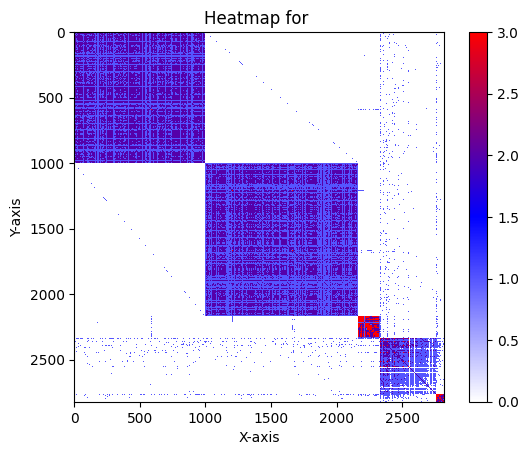

In [9]:
from matplotlib import pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

def heatmap(A, caption):
    cmap = LinearSegmentedColormap.from_list('custom_cmap', [(0, 'white'), (0.5, 'blue'), (1, 'red')])
    # plt.figure(figsize=(8, 8))  # Adjust the figsize as needed

    plt.imshow(A, cmap=cmap, interpolation='nearest')
    plt.colorbar()  # Add a colorbar to the heatmap
    plt.title(f'Heatmap for {caption}')
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')

    # Show the heatmap
    plt.show()    

heatmap(B, '')

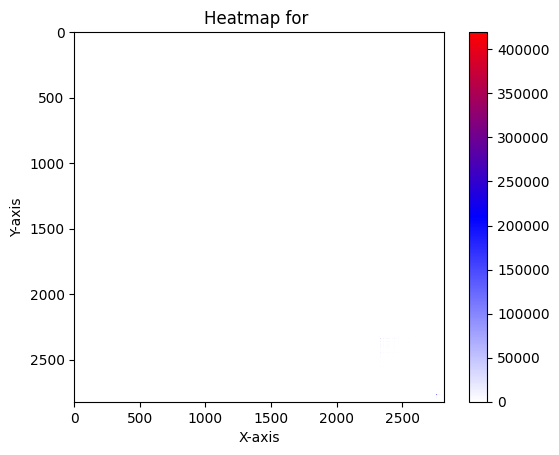

In [10]:
A = np.sum(As, axis=0)
finalA = np.zeros((A.shape))
for i in range(A.shape[0]):
    for j in range(A.shape[1]):
        if A[i][j]>0:
            finalA[i][j] = A[i][j]/B[i][j]
finalA

heatmap(finalA, '')



In [13]:
import pickle

filename = "Data/symmetricPath/data.pickle"

# Save the NumPy array to a pickle file
with open("Data/symmetricPath/data_B.pickle", 'wb') as file:
    pickle.dump(B, file)

with open(filename, 'wb') as file:
    pickle.dump(finalA, file)

with open('Data/symmetricPath/patients.pickle', 'wb') as file:
    pickle.dump(Patients, file)

with open('Data/symmetricPath/visits.pickle', 'wb') as file:
    pickle.dump(Visits, file)

with open('Data/symmetricPath/medication.pickle', 'wb') as file:
    pickle.dump(Medications, file)

with open('Data/symmetricPath/diagnosis.pickle', 'wb') as file:
    pickle.dump(Diagnosis, file)

with open('Data/symmetricPath/procedures.pickle', 'wb') as file:
    pickle.dump(Procedures, file)

print(f"Array saved to {filename}")

Array saved to Data/symmetricPath/data.pickle
